In [1]:
import emby
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import time

SKlearn Digits
---

In [ ]:
%%time
from sklearn.datasets import load_digits

digits = load_digits()

x = digits.data
y = digits.target

x = x - x.mean()

som = emby.SOM(Z=2, 
               learning_rate=0.5,
               y_variance=0.2, 
               epochs=2000, 
               bases=100, 
               logging=emby.Logging.Progress, 
               device=emby.Device.CPU,
               uniform_base_position="origo")

colors = np.array(list(mcolors.TABLEAU_COLORS.values()))

timestamp = time.time()
embeddings = som.fit_transform(x) + np.random.normal(0, 0.01, size=(len(x), 2))
print(f"Time to fit transform {time.time() - timestamp}")

plt.figure(figsize=(8, 8))
plt.scatter(embeddings[:, 0], embeddings[:, 1], color=colors[y])
plt.show()


epoch 0  /  2000  --  26102.541253509098
epoch 1  /  2000  --  4349.738506080523
epoch 2  /  2000  --  3545.11096481882
epoch 3  /  2000  --  1526.2821088694209
epoch 4  /  2000  --  769.6746535364656
epoch 5  /  2000  --  519.3067907555703
epoch 6  /  2000  --  607.2164091663618
epoch 7  /  2000  --  647.9875854313816
epoch 8  /  2000  --  408.779278577883
epoch 9  /  2000  --  583.6764272479525
epoch 10  /  2000  --  449.7073079376315
epoch 11  /  2000  --  213.1672307244733
epoch 12  /  2000  --  85.19920906810451
epoch 13  /  2000  --  0.06505301129827752
epoch 14  /  2000  --  0.0
epoch 15  /  2000  --  0.0
epoch 16  /  2000  --  0.0
epoch 17  /  2000  --  0.0
epoch 18  /  2000  --  0.0
epoch 19  /  2000  --  0.0
epoch 20  /  2000  --  0.0
epoch 21  /  2000  --  0.0
epoch 22  /  2000  --  0.0
epoch 23  /  2000  --  0.0
epoch 24  /  2000  --  0.0
epoch 25  /  2000  --  0.0
epoch 26  /  2000  --  0.0
epoch 27  /  2000  --  0.0
epoch 28  /  2000  --  0.0
epoch 29  /  2000  --  0.0
ep

epoch 295  /  2000  --  0.0
epoch 296  /  2000  --  0.0
epoch 297  /  2000  --  0.0
epoch 298  /  2000  --  0.0
epoch 299  /  2000  --  0.0
epoch 300  /  2000  --  0.0
epoch 301  /  2000  --  0.0
epoch 302  /  2000  --  0.0
epoch 303  /  2000  --  0.0
epoch 304  /  2000  --  0.0
epoch 305  /  2000  --  0.0
epoch 306  /  2000  --  0.0
epoch 307  /  2000  --  0.0
epoch 308  /  2000  --  0.0
epoch 309  /  2000  --  0.0
epoch 310  /  2000  --  0.0
epoch 311  /  2000  --  0.0
epoch 312  /  2000  --  0.0
epoch 313  /  2000  --  0.0
epoch 314  /  2000  --  0.0
epoch 315  /  2000  --  0.0
epoch 316  /  2000  --  0.0
epoch 317  /  2000  --  0.0
epoch 318  /  2000  --  0.0
epoch 319  /  2000  --  0.0
epoch 320  /  2000  --  0.0
epoch 321  /  2000  --  0.0
epoch 322  /  2000  --  0.0
epoch 323  /  2000  --  0.0
epoch 324  /  2000  --  0.0
epoch 325  /  2000  --  0.0
epoch 326  /  2000  --  0.0
epoch 327  /  2000  --  0.0
epoch 328  /  2000  --  0.0
epoch 329  /  2000  --  0.0
epoch 330  /  2000  

Found 1 CUDA devices
id 0    b'GeForce GTX 1080 Ti'                              [SUPPORTED]
                      compute capability: 6.1
                           pci device id: 0
                              pci bus id: 1
Summary:
	1/1 devices are supported
Device GPU
Fitted done/  500 -- movement:  0.5533848697394795  -- time:  5.9330315589904785         


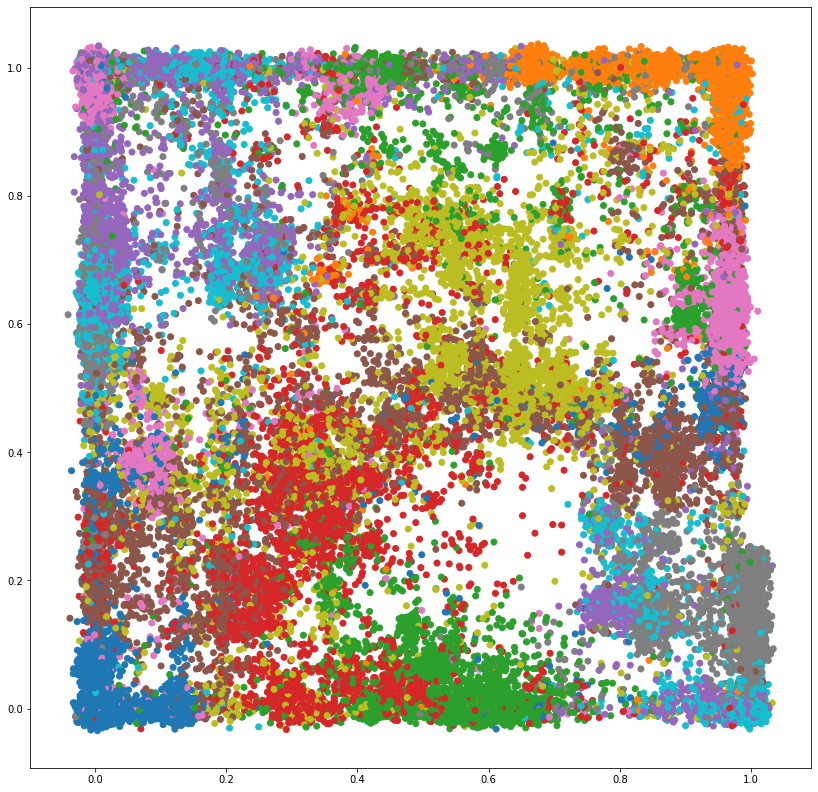

In [14]:
import tensorflow_datasets as tfds

mnist = tfds.load(name="mnist")["train"]
mnist_data = []
mnist_labels = []
for sample in tfds.as_numpy(mnist):
    image = sample["image"]
    label = sample["label"]

    mnist_data.append(image.reshape(-1) / 256)
    mnist_labels.append(label)

x, y = np.array(mnist_data), np.array(mnist_labels)

x = x - x.mean()

som = emby.SOM(Z=2, 
               bases=1000, 
               epochs=500,
               learning_rate=0.1,
               y_variance=0.15,
               logging=emby.Logging.Everything,
               uniform_base_position="origo")

colors = np.array(list(mcolors.TABLEAU_COLORS.values()))

embeddings = som.fit_transform(x) + np.random.normal(0, 0.01, size=(len(x), 2))
print("Fitted done")

plt.figure(figsize=(14, 14))
plt.scatter(embeddings[:, 0], embeddings[:, 1], color=colors[y])
plt.show()
